In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import time, os

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
lyrics = pd.read_csv('lyrics-data.csv')

In [6]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB


In [7]:
lyrics.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [8]:
genres = pd.read_csv('genres_v2.csv')

/Users/cy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [10]:
genres = genres[['song_name','genre']]
genres

,song_name,genre
0,Mercury: Retrograde,Dark Trap
1,Pathology,Dark Trap
2,Symbiote,Dark Trap
3,ProductOfDrugs (Prod. The Virus and Antidote),Dark Trap
4,Venom,Dark Trap
...,...,...
42300,NaN,hardstyle
42301,NaN,hardstyle
42302,NaN,hardstyle
42303,NaN,hardstyle


In [11]:
genres.dropna(inplace = True)
genres

,song_name,genre
0,Mercury: Retrograde,Dark Trap
1,Pathology,Dark Trap
2,Symbiote,Dark Trap
3,ProductOfDrugs (Prod. The Virus and Antidote),Dark Trap
4,Venom,Dark Trap
...,...,...
21520,Daddy's Girl,Hiphop
21521,'94,Hiphop
21522,Born 2 Live,Hiphop
21523,Can't Hold On,Hiphop


In [12]:
lyrics.rename(columns={'SName':'name'},inplace = True)
genres.rename(columns={'song_name':'name'},inplace = True)
n_df = df.merge(lyrics, on='name')
new_df = n_df.merge(genres,on='name')


In [13]:
new_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,ALink,SLink,Lyric,language,genre
0,0.406,1921,0.447000,['THE GUY'],0.708,279171,0.544,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,...,Don't Run,0,1921-09-11,0.0316,120.000,/jordan-knight/,/jordan-knight/dont-run.html,I feel like the world is on my head\nI don't w...,en,Hiphop
1,0.272,1921,0.104000,['THE GUY'],0.605,133669,0.329,1,4rkLztWpftdp6wJXtwmNWP,0.092300,...,I Don't Need You,0,1921-09-11,0.0354,79.934,/die-antwoord/,/die-antwoord/i-dont-need-you.html,"(synth voice)\nI dont need you, I dont need yo...",en,RnB
2,0.272,1921,0.104000,['THE GUY'],0.605,133669,0.329,1,4rkLztWpftdp6wJXtwmNWP,0.092300,...,I Don't Need You,0,1921-09-11,0.0354,79.934,/my-bloody-valentine/,/my-bloody-valentine/i-dont-need-you.html,Do you think that I still love you?\nIf you ac...,en,RnB
3,0.309,1981,0.116000,['Kenny Rogers'],0.501,208867,0.300,0,2FOIK633FgeVKWGl4bjSZU,0.000015,...,I Don't Need You,45,1981-06-15,0.0328,135.195,/die-antwoord/,/die-antwoord/i-dont-need-you.html,"(synth voice)\nI dont need you, I dont need yo...",en,RnB
4,0.309,1981,0.116000,['Kenny Rogers'],0.501,208867,0.300,0,2FOIK633FgeVKWGl4bjSZU,0.000015,...,I Don't Need You,45,1981-06-15,0.0328,135.195,/my-bloody-valentine/,/my-bloody-valentine/i-dont-need-you.html,Do you think that I still love you?\nIf you ac...,en,RnB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525712,0.622,2020,0.000123,['AC/DC'],0.549,211147,0.731,0,1nuPjx9gZH0aHZt8Q5Njx6,0.000013,...,Code Red,67,2020-11-13,0.0350,86.239,/will-smith/,/will-smith/code-red.html,Verse 1:\n\nHere's a little story 'bout a Frid...,en,Underground Rap
525713,0.622,2020,0.000123,['AC/DC'],0.549,211147,0.731,0,1nuPjx9gZH0aHZt8Q5Njx6,0.000013,...,Code Red,67,2020-11-13,0.0350,86.239,/ac-dc/,/ac-dc/code-red.html,"Loading up the battery, raising up insanity\nB...",en,Underground Rap
525714,0.622,2020,0.000123,['AC/DC'],0.549,211147,0.731,0,1nuPjx9gZH0aHZt8Q5Njx6,0.000013,...,Code Red,67,2020-11-13,0.0350,86.239,/omarion/,/omarion/code-red.html,I Get the girls that's pretty in face\nReal ni...,en,Underground Rap
525715,0.622,2020,0.000123,['AC/DC'],0.549,211147,0.731,0,1nuPjx9gZH0aHZt8Q5Njx6,0.000013,...,Code Red,67,2020-11-13,0.0350,86.239,/jazzy-jeff-and-the-fresh-prince/,/jazzy-jeff-and-the-fresh-prince/code-red.html,[Verse 1:]\n\nHere's a little story 'bout a Fr...,en,Underground Rap


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525717 entries, 0 to 525716
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           525717 non-null  float64
 1   year              525717 non-null  int64  
 2   acousticness      525717 non-null  float64
 3   artists           525717 non-null  object 
 4   danceability      525717 non-null  float64
 5   duration_ms       525717 non-null  int64  
 6   energy            525717 non-null  float64
 7   explicit          525717 non-null  int64  
 8   id                525717 non-null  object 
 9   instrumentalness  525717 non-null  float64
 10  key               525717 non-null  int64  
 11  liveness          525717 non-null  float64
 12  loudness          525717 non-null  float64
 13  mode              525717 non-null  int64  
 14  name              525717 non-null  object 
 15  popularity        525717 non-null  int64  
 16  release_date      52

In [15]:
new_df.drop_duplicates(subset = ['name'],inplace = True,keep = 'first')

In [16]:
new_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,ALink,SLink,Lyric,language,genre
0,0.4060,1921,0.447000,['THE GUY'],0.708,279171,0.5440,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,...,Don't Run,0,1921-09-11,0.0316,120.000,/jordan-knight/,/jordan-knight/dont-run.html,I feel like the world is on my head\nI don't w...,en,Hiphop
1,0.2720,1921,0.104000,['THE GUY'],0.605,133669,0.3290,1,4rkLztWpftdp6wJXtwmNWP,0.092300,...,I Don't Need You,0,1921-09-11,0.0354,79.934,/die-antwoord/,/die-antwoord/i-dont-need-you.html,"(synth voice)\nI dont need you, I dont need yo...",en,RnB
5,0.7530,1923,0.994000,"[""King Oliver's Creole Jazz Band""]",0.359,187227,0.3570,0,5SvyP1ZeJX1jA7AOZD08NA,0.819000,...,Tears,10,1923,0.0511,205.053,/kylie-minogue/,/kylie-minogue/tears.html,Never would say\nI never needed anyone\nNot no...,en,Dark Trap
425,0.8890,1923,0.979000,['Louis Armstrong'],0.717,205533,0.2090,0,300WVfsVnOUJM2KXAm9IGS,0.439000,...,Stardust,8,1923,0.0622,127.401,/michael-buble/,/michael-buble/stardust.html,And now the purple dust of twilight time\nstea...,en,Rap
935,0.8900,1923,0.942000,['Fletcher Henderson & His Orchestra'],0.809,171373,0.4080,0,5pIiw01BoIPnkQQI1AZHQL,0.039800,...,T.N.T.,6,1923,0.0846,113.494,/ac-dc/,/ac-dc/t-n-t.html,"Aye, aye, aye, aye, aye,\nAye, aye, aye, aye, ...",en,Underground Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525706,0.0795,2019,0.956000,['Delle Alpi'],0.261,158424,0.0257,0,6nx6oC4HgnZOxC4dgsPiIU,0.878000,...,Falling Stars,65,2019-09-12,0.0406,72.323,/serj-tankian/,/serj-tankian/falling-stars.html,Please raise your child to day\nThe way that y...,en,Dark Trap
525709,0.7100,2019,0.213000,"['GASHI', 'G-Eazy']",0.840,190345,0.8110,1,1N8moY6H0eThviK71VhTzY,0.000000,...,My Year,62,2019-09-20,0.0498,145.025,/gucci-mane/,/gucci-mane/my-year.html,"[Intro]\nIt's my year, it's my year\nAnd look ...",en,Underground Rap
525710,0.4010,2020,0.373000,"['MO3', 'Kevin Gates']",0.768,174145,0.5000,1,7DDBXN6McFPfR1LF1UqbDp,0.000000,...,Broken Love,63,2020-08-14,0.6200,79.948,/gemini-kor/,/gemini-kor/broken-love.html,Once the winter weather\nPasses by the mind\nA...,en,Pop
525711,0.8930,2020,0.228000,['Bryson Tiller'],0.741,174093,0.6400,1,1zmv0tPVWdbCuvBw90MYwO,0.000086,...,I'm Ready For You,66,2020-10-02,0.4050,179.095,/drake/,/drake/im-ready-for-you.html,"[Drake]\nR.I.P. to the girl you used to see,\n...",en,RnB


In [17]:
new_df.dropna(inplace = True)

In [18]:
new_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,ALink,SLink,Lyric,language,genre
0,0.4060,1921,0.447000,['THE GUY'],0.708,279171,0.5440,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,...,Don't Run,0,1921-09-11,0.0316,120.000,/jordan-knight/,/jordan-knight/dont-run.html,I feel like the world is on my head\nI don't w...,en,Hiphop
1,0.2720,1921,0.104000,['THE GUY'],0.605,133669,0.3290,1,4rkLztWpftdp6wJXtwmNWP,0.092300,...,I Don't Need You,0,1921-09-11,0.0354,79.934,/die-antwoord/,/die-antwoord/i-dont-need-you.html,"(synth voice)\nI dont need you, I dont need yo...",en,RnB
5,0.7530,1923,0.994000,"[""King Oliver's Creole Jazz Band""]",0.359,187227,0.3570,0,5SvyP1ZeJX1jA7AOZD08NA,0.819000,...,Tears,10,1923,0.0511,205.053,/kylie-minogue/,/kylie-minogue/tears.html,Never would say\nI never needed anyone\nNot no...,en,Dark Trap
425,0.8890,1923,0.979000,['Louis Armstrong'],0.717,205533,0.2090,0,300WVfsVnOUJM2KXAm9IGS,0.439000,...,Stardust,8,1923,0.0622,127.401,/michael-buble/,/michael-buble/stardust.html,And now the purple dust of twilight time\nstea...,en,Rap
935,0.8900,1923,0.942000,['Fletcher Henderson & His Orchestra'],0.809,171373,0.4080,0,5pIiw01BoIPnkQQI1AZHQL,0.039800,...,T.N.T.,6,1923,0.0846,113.494,/ac-dc/,/ac-dc/t-n-t.html,"Aye, aye, aye, aye, aye,\nAye, aye, aye, aye, ...",en,Underground Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525706,0.0795,2019,0.956000,['Delle Alpi'],0.261,158424,0.0257,0,6nx6oC4HgnZOxC4dgsPiIU,0.878000,...,Falling Stars,65,2019-09-12,0.0406,72.323,/serj-tankian/,/serj-tankian/falling-stars.html,Please raise your child to day\nThe way that y...,en,Dark Trap
525709,0.7100,2019,0.213000,"['GASHI', 'G-Eazy']",0.840,190345,0.8110,1,1N8moY6H0eThviK71VhTzY,0.000000,...,My Year,62,2019-09-20,0.0498,145.025,/gucci-mane/,/gucci-mane/my-year.html,"[Intro]\nIt's my year, it's my year\nAnd look ...",en,Underground Rap
525710,0.4010,2020,0.373000,"['MO3', 'Kevin Gates']",0.768,174145,0.5000,1,7DDBXN6McFPfR1LF1UqbDp,0.000000,...,Broken Love,63,2020-08-14,0.6200,79.948,/gemini-kor/,/gemini-kor/broken-love.html,Once the winter weather\nPasses by the mind\nA...,en,Pop
525711,0.8930,2020,0.228000,['Bryson Tiller'],0.741,174093,0.6400,1,1zmv0tPVWdbCuvBw90MYwO,0.000086,...,I'm Ready For You,66,2020-10-02,0.4050,179.095,/drake/,/drake/im-ready-for-you.html,"[Drake]\nR.I.P. to the girl you used to see,\n...",en,RnB


In [19]:
new_df.reset_index(drop= True)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,ALink,SLink,Lyric,language,genre
0,0.4060,1921,0.447000,['THE GUY'],0.708,279171,0.5440,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,...,Don't Run,0,1921-09-11,0.0316,120.000,/jordan-knight/,/jordan-knight/dont-run.html,I feel like the world is on my head\nI don't w...,en,Hiphop
1,0.2720,1921,0.104000,['THE GUY'],0.605,133669,0.3290,1,4rkLztWpftdp6wJXtwmNWP,0.092300,...,I Don't Need You,0,1921-09-11,0.0354,79.934,/die-antwoord/,/die-antwoord/i-dont-need-you.html,"(synth voice)\nI dont need you, I dont need yo...",en,RnB
2,0.7530,1923,0.994000,"[""King Oliver's Creole Jazz Band""]",0.359,187227,0.3570,0,5SvyP1ZeJX1jA7AOZD08NA,0.819000,...,Tears,10,1923,0.0511,205.053,/kylie-minogue/,/kylie-minogue/tears.html,Never would say\nI never needed anyone\nNot no...,en,Dark Trap
3,0.8890,1923,0.979000,['Louis Armstrong'],0.717,205533,0.2090,0,300WVfsVnOUJM2KXAm9IGS,0.439000,...,Stardust,8,1923,0.0622,127.401,/michael-buble/,/michael-buble/stardust.html,And now the purple dust of twilight time\nstea...,en,Rap
4,0.8900,1923,0.942000,['Fletcher Henderson & His Orchestra'],0.809,171373,0.4080,0,5pIiw01BoIPnkQQI1AZHQL,0.039800,...,T.N.T.,6,1923,0.0846,113.494,/ac-dc/,/ac-dc/t-n-t.html,"Aye, aye, aye, aye, aye,\nAye, aye, aye, aye, ...",en,Underground Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,0.0795,2019,0.956000,['Delle Alpi'],0.261,158424,0.0257,0,6nx6oC4HgnZOxC4dgsPiIU,0.878000,...,Falling Stars,65,2019-09-12,0.0406,72.323,/serj-tankian/,/serj-tankian/falling-stars.html,Please raise your child to day\nThe way that y...,en,Dark Trap
3302,0.7100,2019,0.213000,"['GASHI', 'G-Eazy']",0.840,190345,0.8110,1,1N8moY6H0eThviK71VhTzY,0.000000,...,My Year,62,2019-09-20,0.0498,145.025,/gucci-mane/,/gucci-mane/my-year.html,"[Intro]\nIt's my year, it's my year\nAnd look ...",en,Underground Rap
3303,0.4010,2020,0.373000,"['MO3', 'Kevin Gates']",0.768,174145,0.5000,1,7DDBXN6McFPfR1LF1UqbDp,0.000000,...,Broken Love,63,2020-08-14,0.6200,79.948,/gemini-kor/,/gemini-kor/broken-love.html,Once the winter weather\nPasses by the mind\nA...,en,Pop
3304,0.8930,2020,0.228000,['Bryson Tiller'],0.741,174093,0.6400,1,1zmv0tPVWdbCuvBw90MYwO,0.000086,...,I'm Ready For You,66,2020-10-02,0.4050,179.095,/drake/,/drake/im-ready-for-you.html,"[Drake]\nR.I.P. to the girl you used to see,\n...",en,RnB


In [20]:
new_df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'ALink', 'SLink', 'Lyric', 'language', 'genre'],
      dtype='object')

In [21]:
new_df.groupby(['language']).count()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,mode,name,popularity,release_date,speechiness,tempo,ALink,SLink,Lyric,genre
language,,,,,,,,,,,,,,,,,,,,,
de,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
en,3222,3222,3222,3222,3222,3222,3222,3222,3222,3222,...,3222,3222,3222,3222,3222,3222,3222,3222,3222,3222
es,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
fi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fr,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
it,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
no,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
pt,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
rw,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [22]:
final_df = new_df[new_df['language']=='en']

In [23]:
final_df.reset_index(drop=True,inplace = True)

In [24]:
final_df['explicit'].unique()

array([1, 0])

In [25]:
final_df['mode'].unique()

array([1, 0])

In [26]:
final_df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'ALink', 'SLink', 'Lyric', 'language', 'genre'],
      dtype='object')

In [27]:
eng_df = final_df[['name','artists','year','key','tempo',
                   'acousticness','danceability','energy','liveness',
                   'loudness','speechiness','genre','Lyric']]

In [28]:
eng_df

,name,artists,year,key,tempo,acousticness,danceability,energy,liveness,loudness,speechiness,genre,Lyric
0,Don't Run,['THE GUY'],1921,0,120.000,0.447000,0.708,0.5440,0.0733,-8.124,0.0316,Hiphop,I feel like the world is on my head\nI don't w...
1,I Don't Need You,['THE GUY'],1921,11,79.934,0.104000,0.605,0.3290,0.3340,-11.636,0.0354,RnB,"(synth voice)\nI dont need you, I dont need yo..."
2,Tears,"[""King Oliver's Creole Jazz Band""]",1923,3,205.053,0.994000,0.359,0.3570,0.2900,-11.810,0.0511,Dark Trap,Never would say\nI never needed anyone\nNot no...
3,Stardust,['Louis Armstrong'],1923,1,127.401,0.979000,0.717,0.2090,0.0609,-13.224,0.0622,Rap,And now the purple dust of twilight time\nstea...
4,T.N.T.,['Fletcher Henderson & His Orchestra'],1923,1,113.494,0.942000,0.809,0.4080,0.3070,-12.035,0.0846,Underground Rap,"Aye, aye, aye, aye, aye,\nAye, aye, aye, aye, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,Falling Stars,['Delle Alpi'],2019,1,72.323,0.956000,0.261,0.0257,0.1110,-25.711,0.0406,Dark Trap,Please raise your child to day\nThe way that y...
3218,My Year,"['GASHI', 'G-Eazy']",2019,11,145.025,0.213000,0.840,0.8110,0.2580,-3.243,0.0498,Underground Rap,"[Intro]\nIt's my year, it's my year\nAnd look ..."
3219,Broken Love,"['MO3', 'Kevin Gates']",2020,1,79.948,0.373000,0.768,0.5000,0.1450,-7.217,0.6200,Pop,Once the winter weather\nPasses by the mind\nA...
3220,I'm Ready For You,['Bryson Tiller'],2020,0,179.095,0.228000,0.741,0.6400,0.1380,-6.452,0.4050,RnB,"[Drake]\nR.I.P. to the girl you used to see,\n..."


In [29]:
df = eng_df.copy()

In [30]:
import re
import string

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def remove_punc(text):
    punct_free = "".join([i for i in text if not i in string.punctuation])
    return punct_free

In [33]:
df = eng_df.copy()

In [34]:
df['vec'] = df.Lyric.apply(lambda x : remove_punc(x))

In [35]:
df['vec'] = df['vec'].apply(lambda x:x.lower())

In [36]:
df['vec'] = df['vec'].apply(lambda x:x.replace('\n',' '))

In [37]:
df['vec']

0       i feel like the world is on my head i dont wan...
1       synth voice i dont need you i dont need you yo...
2       never would say i never needed anyone not now ...
3       and now the purple dust of twilight time steal...
4       aye aye aye aye aye aye aye aye aye aye  see m...
                              ...                        
3217    please raise your child to day the way that yo...
3218    intro its my year its my year and look at my c...
3219    once the winter weather passes by the mind a l...
3220    drake rip to the girl you used to see her days...
3221    verse 1  heres a little story bout a friday ni...
Name: vec, Length: 3222, dtype: object

In [38]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [39]:
import nltk
from nltk.corpus import stopwords

In [40]:
stopwords = stopwords.words('english')

In [41]:
stopwords.extend(['wa','uh','ooh','yeah','oh','whoa','woah','la','na','da','di','lala'])

In [42]:
def lemmatizer(text):
    lem_text = [wordnet_lemmatizer.lemmatize(word)for word in text.split()]
    return lem_text
    

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = stopwords ,tokenizer=lemmatizer)

In [44]:
lyrics_martix = tfidf.fit_transform(df.vec)

/Users/cy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [45]:
vocab = tfidf.get_feature_names()

In [46]:
from sklearn.decomposition import NMF

In [47]:
nmf = NMF(n_components=6)

In [48]:
topic_values = nmf.fit_transform(lyrics_martix)

/Users/cy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [49]:
topic_matrix_df = pd.DataFrame(topic_values).add_prefix('topic_')

In [50]:
topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,0.042887,0.000000,0.023896,0.036586,0.101577,0.112308
1,0.000000,0.018244,0.001814,0.000000,0.003482,0.213700
2,0.018568,0.000000,0.081696,0.000000,0.113792,0.000000
3,0.039015,0.000000,0.056917,0.000000,0.000000,0.000000
4,0.001796,0.009248,0.000000,0.000000,0.027701,0.003919
...,...,...,...,...,...,...
3217,0.030641,0.000000,0.002739,0.000953,0.003214,0.000000
3218,0.006623,0.022298,0.000000,0.000000,0.049945,0.034001
3219,0.012833,0.004550,0.118238,0.000000,0.019940,0.049708
3220,0.005533,0.019355,0.000000,0.038609,0.037376,0.012869


In [51]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')

In [52]:
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,0.000000,0.002767,0.000000,0.00345,0.0,0.000415
000,0.000000,0.002534,0.000000,0.00000,0.0,0.000000
02,0.000000,0.002163,0.000101,0.00000,0.0,0.000000
03,0.000675,0.000506,0.000005,0.00000,0.0,0.000000
05,0.000234,0.001793,0.000204,0.00000,0.0,0.000000
...,...,...,...,...,...,...
아닌,0.000000,0.000000,0.002645,0.00000,0.0,0.000493
이제,0.000000,0.000000,0.002645,0.00000,0.0,0.000493
차가워져만,0.000000,0.000000,0.002645,0.00000,0.0,0.000493
태우고,0.000000,0.000000,0.002645,0.00000,0.0,0.000493


In [53]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
never,0.696906,0.063925,0.029319,0.000000,0.023844,0.000000
time,0.567038,0.069095,0.052174,0.095146,0.031505,0.024673
away,0.535203,0.000000,0.000000,0.000000,0.000000,0.000000
one,0.514618,0.078356,0.064191,0.062132,0.116138,0.026819
ill,0.459875,0.003610,0.047274,0.096711,0.070413,0.030619
life,0.459676,0.096138,0.066487,0.000000,0.000000,0.000000
day,0.452947,0.040166,0.011933,0.000000,0.010481,0.000000
feel,0.401707,0.000000,0.080066,0.089960,0.058843,0.098471
could,0.398606,0.026456,0.005495,0.047885,0.011838,0.043270
see,0.387506,0.141443,0.020784,0.082113,0.014346,0.149258


In [54]:
def top_words(word_topic_matrix_df, topic, n_words):
    return ((word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]).to_frame()

In [55]:
zero = top_words(word_topic_matrix_df, 'topic_0', 10)
one = top_words(word_topic_matrix_df, 'topic_1', 10)
two = top_words(word_topic_matrix_df, 'topic_2', 10)
three = top_words(word_topic_matrix_df, 'topic_3', 10)
four = top_words(word_topic_matrix_df, 'topic_4', 10)
five = top_words(word_topic_matrix_df, 'topic_5', 10)



In [56]:
x =[]

In [57]:

x.append(zero.index)
x.append(one.index)
x.append(two.index)
x.append(three.index)
x.append(four.index)
x.append(five.index)


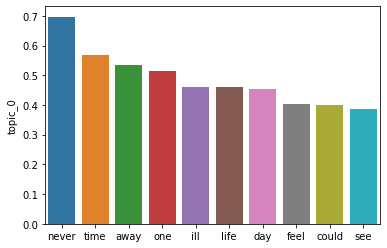

In [58]:
sns.barplot(x=zero.index,y = 'topic_0',data=zero)
figsize=(12, 8)

<AxesSubplot:ylabel='topic_1'>

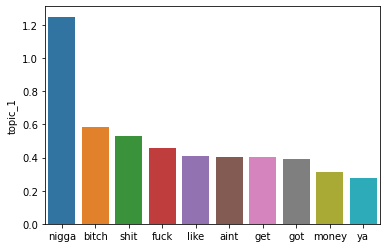

In [59]:
sns.barplot(x=one.index,y = 'topic_1',data=one)

<AxesSubplot:ylabel='topic_2'>

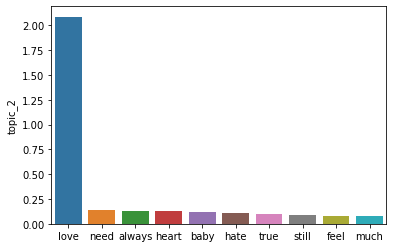

In [60]:
sns.barplot(x=two.index,y = 'topic_2',data=two)

<AxesSubplot:ylabel='topic_3'>

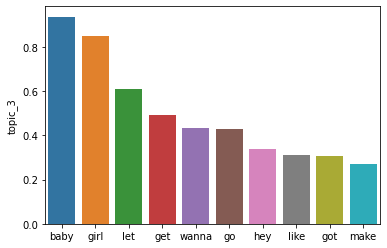

In [61]:
sns.barplot(x=three.index,y = 'topic_3',data=three)

<AxesSubplot:ylabel='topic_4'>

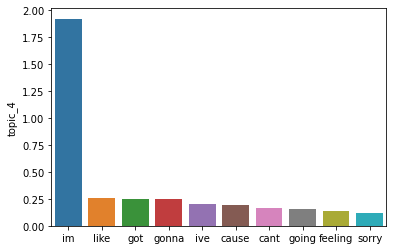

In [62]:
sns.barplot(x=four.index,y = 'topic_4',data=four)

<AxesSubplot:ylabel='topic_5'>

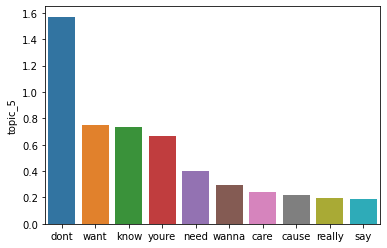

In [63]:
sns.barplot(x=five.index,y = 'topic_5',data=five)

In [64]:
final_df = eng_df.copy()

In [65]:
final_df = final_df.join(topic_matrix_df)

In [66]:
final_df.drop(columns=['Lyric'],inplace=True)

In [67]:
final_df

,name,artists,year,key,tempo,acousticness,danceability,energy,liveness,loudness,speechiness,genre,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,Don't Run,['THE GUY'],1921,0,120.000,0.447000,0.708,0.5440,0.0733,-8.124,0.0316,Hiphop,0.042887,0.000000,0.023896,0.036586,0.101577,0.112308
1,I Don't Need You,['THE GUY'],1921,11,79.934,0.104000,0.605,0.3290,0.3340,-11.636,0.0354,RnB,0.000000,0.018244,0.001814,0.000000,0.003482,0.213700
2,Tears,"[""King Oliver's Creole Jazz Band""]",1923,3,205.053,0.994000,0.359,0.3570,0.2900,-11.810,0.0511,Dark Trap,0.018568,0.000000,0.081696,0.000000,0.113792,0.000000
3,Stardust,['Louis Armstrong'],1923,1,127.401,0.979000,0.717,0.2090,0.0609,-13.224,0.0622,Rap,0.039015,0.000000,0.056917,0.000000,0.000000,0.000000
4,T.N.T.,['Fletcher Henderson & His Orchestra'],1923,1,113.494,0.942000,0.809,0.4080,0.3070,-12.035,0.0846,Underground Rap,0.001796,0.009248,0.000000,0.000000,0.027701,0.003919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,Falling Stars,['Delle Alpi'],2019,1,72.323,0.956000,0.261,0.0257,0.1110,-25.711,0.0406,Dark Trap,0.030641,0.000000,0.002739,0.000953,0.003214,0.000000
3218,My Year,"['GASHI', 'G-Eazy']",2019,11,145.025,0.213000,0.840,0.8110,0.2580,-3.243,0.0498,Underground Rap,0.006623,0.022298,0.000000,0.000000,0.049945,0.034001
3219,Broken Love,"['MO3', 'Kevin Gates']",2020,1,79.948,0.373000,0.768,0.5000,0.1450,-7.217,0.6200,Pop,0.012833,0.004550,0.118238,0.000000,0.019940,0.049708
3220,I'm Ready For You,['Bryson Tiller'],2020,0,179.095,0.228000,0.741,0.6400,0.1380,-6.452,0.4050,RnB,0.005533,0.019355,0.000000,0.038609,0.037376,0.012869


In [68]:
def decade(num):
    num = str(num)
    return num[:3]+'0s'

In [69]:
final_df['decade'] = final_df['year'].apply(lambda x:decade(x))

In [70]:
final_df['decade']

0       1920s
1       1920s
2       1920s
3       1920s
4       1920s
        ...  
3217    2010s
3218    2010s
3219    2020s
3220    2020s
3221    2020s
Name: decade, Length: 3222, dtype: object

In [71]:
final_df.drop(columns=['year'],inplace=True)

In [72]:
f_df = pd.get_dummies(final_df,columns=['decade','key','genre'])

In [73]:
f_df

,name,artists,tempo,acousticness,danceability,energy,liveness,loudness,speechiness,topic_0,...,key_10,key_11,genre_Dark Trap,genre_Emo,genre_Hiphop,genre_Pop,genre_Rap,genre_RnB,genre_Trap Metal,genre_Underground Rap
0,Don't Run,['THE GUY'],120.000,0.447000,0.708,0.5440,0.0733,-8.124,0.0316,0.042887,...,0,0,0,0,1,0,0,0,0,0
1,I Don't Need You,['THE GUY'],79.934,0.104000,0.605,0.3290,0.3340,-11.636,0.0354,0.000000,...,0,1,0,0,0,0,0,1,0,0
2,Tears,"[""King Oliver's Creole Jazz Band""]",205.053,0.994000,0.359,0.3570,0.2900,-11.810,0.0511,0.018568,...,0,0,1,0,0,0,0,0,0,0
3,Stardust,['Louis Armstrong'],127.401,0.979000,0.717,0.2090,0.0609,-13.224,0.0622,0.039015,...,0,0,0,0,0,0,1,0,0,0
4,T.N.T.,['Fletcher Henderson & His Orchestra'],113.494,0.942000,0.809,0.4080,0.3070,-12.035,0.0846,0.001796,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,Falling Stars,['Delle Alpi'],72.323,0.956000,0.261,0.0257,0.1110,-25.711,0.0406,0.030641,...,0,0,1,0,0,0,0,0,0,0
3218,My Year,"['GASHI', 'G-Eazy']",145.025,0.213000,0.840,0.8110,0.2580,-3.243,0.0498,0.006623,...,0,1,0,0,0,0,0,0,0,1
3219,Broken Love,"['MO3', 'Kevin Gates']",79.948,0.373000,0.768,0.5000,0.1450,-7.217,0.6200,0.012833,...,0,0,0,0,0,1,0,0,0,0
3220,I'm Ready For You,['Bryson Tiller'],179.095,0.228000,0.741,0.6400,0.1380,-6.452,0.4050,0.005533,...,0,0,0,0,0,0,0,1,0,0


In [74]:
f_df.drop(columns=['name','artists'],axis = 1,inplace = True)
f_df

,tempo,acousticness,danceability,energy,liveness,loudness,speechiness,topic_0,topic_1,topic_2,...,key_10,key_11,genre_Dark Trap,genre_Emo,genre_Hiphop,genre_Pop,genre_Rap,genre_RnB,genre_Trap Metal,genre_Underground Rap
0,120.000,0.447000,0.708,0.5440,0.0733,-8.124,0.0316,0.042887,0.000000,0.023896,...,0,0,0,0,1,0,0,0,0,0
1,79.934,0.104000,0.605,0.3290,0.3340,-11.636,0.0354,0.000000,0.018244,0.001814,...,0,1,0,0,0,0,0,1,0,0
2,205.053,0.994000,0.359,0.3570,0.2900,-11.810,0.0511,0.018568,0.000000,0.081696,...,0,0,1,0,0,0,0,0,0,0
3,127.401,0.979000,0.717,0.2090,0.0609,-13.224,0.0622,0.039015,0.000000,0.056917,...,0,0,0,0,0,0,1,0,0,0
4,113.494,0.942000,0.809,0.4080,0.3070,-12.035,0.0846,0.001796,0.009248,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,72.323,0.956000,0.261,0.0257,0.1110,-25.711,0.0406,0.030641,0.000000,0.002739,...,0,0,1,0,0,0,0,0,0,0
3218,145.025,0.213000,0.840,0.8110,0.2580,-3.243,0.0498,0.006623,0.022298,0.000000,...,0,1,0,0,0,0,0,0,0,1
3219,79.948,0.373000,0.768,0.5000,0.1450,-7.217,0.6200,0.012833,0.004550,0.118238,...,0,0,0,0,0,1,0,0,0,0
3220,179.095,0.228000,0.741,0.6400,0.1380,-6.452,0.4050,0.005533,0.019355,0.000000,...,0,0,0,0,0,0,0,1,0,0


In [75]:
indices = pd.Series(final_df.index, index=final_df["name"].apply(lambda x:x.lower())).drop_duplicates()

In [76]:
indices

name
don't run               0
i don't need you        1
tears                   2
stardust                3
t.n.t.                  4
                     ... 
falling stars        3217
my year              3218
broken love          3219
i'm ready for you    3220
code red             3221
Length: 3222, dtype: int64

In [77]:
indices['grenade']

1021

In [78]:
indices['faded']

1285

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
cos_sim = cosine_similarity(f_df)

In [81]:
def recommend_song(song_input):
    song_index = indices[song_input]
#get similarity values with other songs
#similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cos_sim[song_index]))
#sort in descending order the similarity score of song inputted with all the other songs
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
# Get the scores of the 10 most similar movies. Ignore the first song - same as inpt
    similarity_score = similarity_score[1:11]
#return songsf using the mapping series
    song_indices = [i[0] for i in similarity_score]
    return (final_df[['name','artists','decade']].iloc[song_indices])

In [82]:
recommend_song('grenade')

,name,artists,decade
1221,Say Something,"['A Great Big World', 'Christina Aguilera']",2010s
1135,Mercy,"['Kanye West', 'Big Sean', 'Pusha T', '2 Chainz']",2010s
596,Drown,['The Smashing Pumpkins'],2000s
2522,Preach,['Young Dolph'],2010s
1949,Green Light,['Lorde'],2010s
2726,Wherever I Go,['OneRepublic'],2010s
1086,Wait,['M83'],2010s
2581,Friend Like Me,['Will Smith'],2010s
2659,You Had Me At Hello,['A Day To Remember'],2000s
10,Sad Song,['Paul Bridgwater'],1920s


In [83]:
recommend_song('faded')

,name,artists,decade
2943,Distance,['AJJ'],2010s
3183,Bullseye,['KDrew'],2010s
2843,Holy Ghost,['BØRNS'],2010s
2676,Discipline,['Nine Inch Nails'],2000s
2714,Crystals,['Of Monsters and Men'],2010s
2738,Hard To Tell,['$uicideBoy$'],2010s
1099,Heartbeat,['Childish Gambino'],2010s
2700,Back Around,['Iration'],2010s
2224,Skin,['Rihanna'],2010s
1261,Paris,['$uicideBoy$'],2010s


In [84]:
topic_matrix_df[topic_matrix_df.index == 1285]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
1285,0.000333,0.00666,0.107937,0.033563,0.077459,0.062662
